In [1]:
library(Seurat)
library(WGCNA)
library(igraph)
library(ggplot2)
library(pheatmap)

Attaching SeuratObject

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
as_matrix <- function(mat){
  
  tmp <- matrix(data=0L, nrow = mat@Dim[1], ncol = mat@Dim[2])
  
  row_pos <- mat@i+1
  col_pos <- findInterval(seq(mat@x)-1,mat@p[-1])+1
  val <- mat@x
  
  for (i in seq_along(val)){
    tmp[row_pos[i],col_pos[i]] <- val[i]
  }
  
  row.names(tmp) <- mat@Dimnames[[1]]
  colnames(tmp) <- mat@Dimnames[[2]]
  return(tmp)
}

In [3]:
dataobj<- readRDS('/data1//chenyx//HHCAd//unit_organized_fetal/Right atria.rds')

In [4]:
table(dataobj$cell_type)


Cardiomyocyte cell   Endothelial cell    Epithelial cell         Fibroblast 
               436                120                  7                204 
        Lymphocyte          Mast cell          Myelocyte                 NA 
                11                 15                 32                  1 
Smooth muscle cell 
                 9 

# CM

In [5]:
ct = "Cardiomyocyte cell"

In [6]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [7]:
df <- df[apply(df,1,mad)>0,]

In [8]:
dim(df)

[1] 2072  436

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

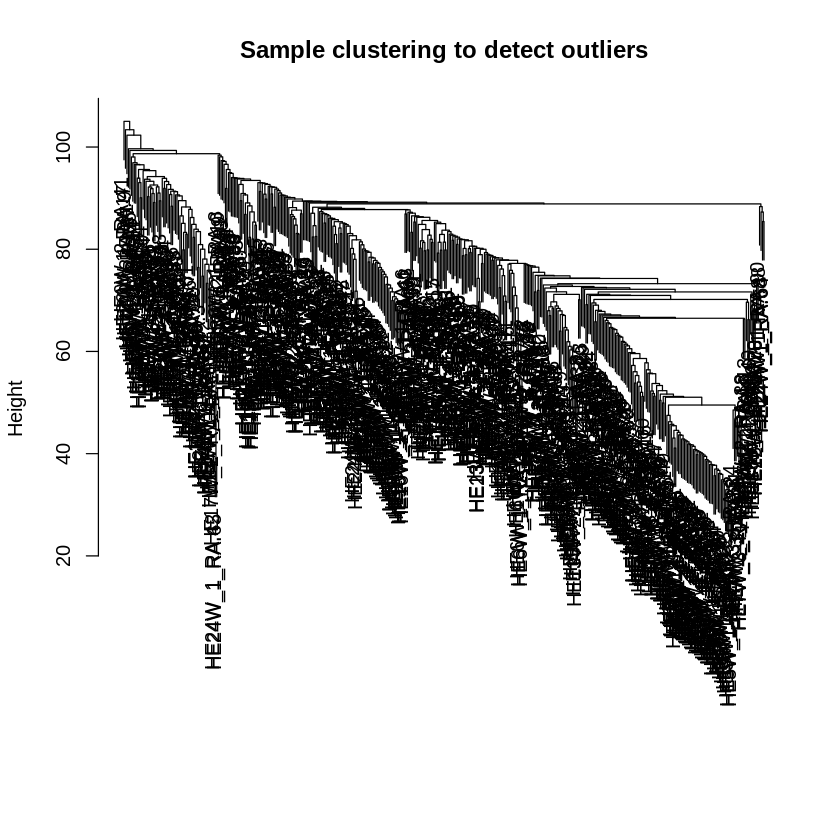

In [9]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [10]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 372 genes from module 1 because their KME is too low.
     ..removing 1 genes from module 2 because their KME is too low.
     ..removing 2 genes from module 3 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


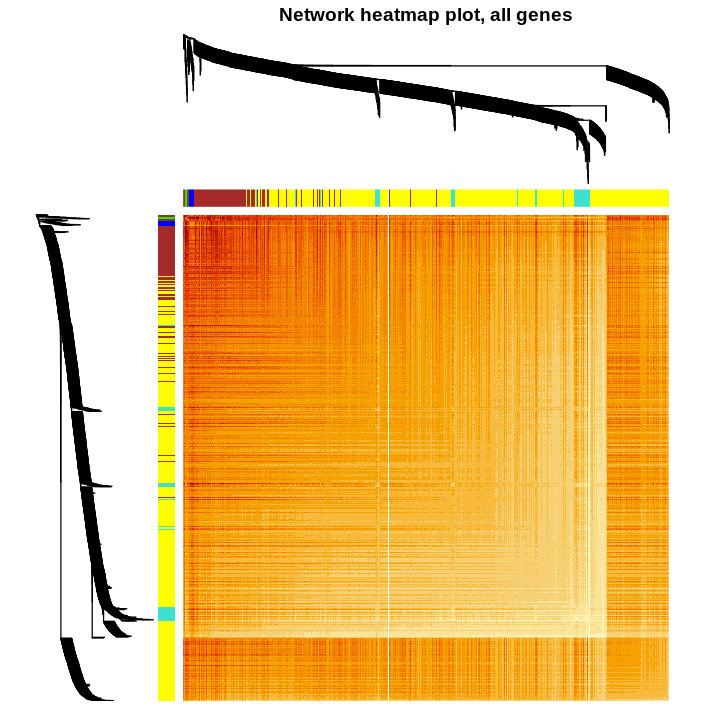

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

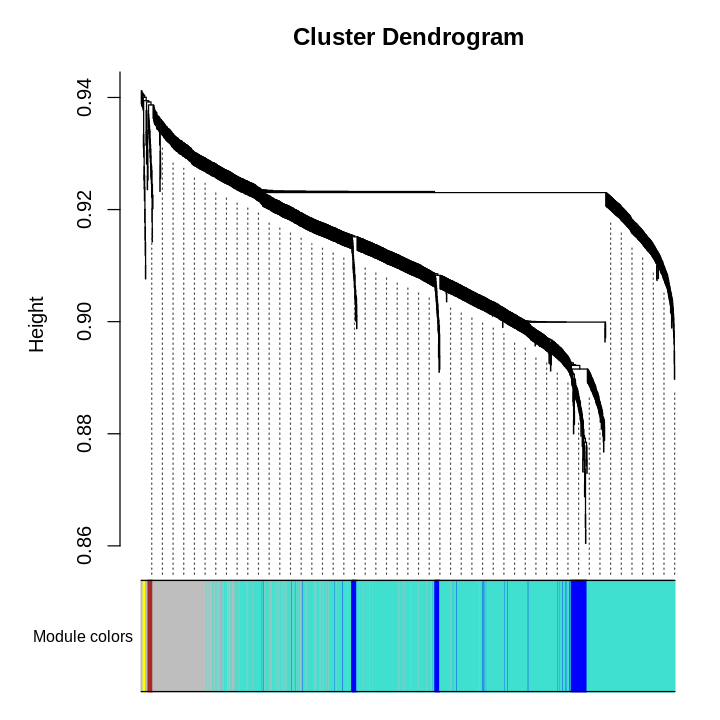

In [12]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [13]:
colors <- table(net$colors)
colors


     blue     brown      grey turquoise    yellow 
      127        19       375      1541        10 

In [14]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [15]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','RA/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# Fb

In [16]:
ct = "Fibroblast"

In [17]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [18]:
df <- df[apply(df,1,mad)>0,]

In [19]:
dim(df)

[1] 3195  204

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

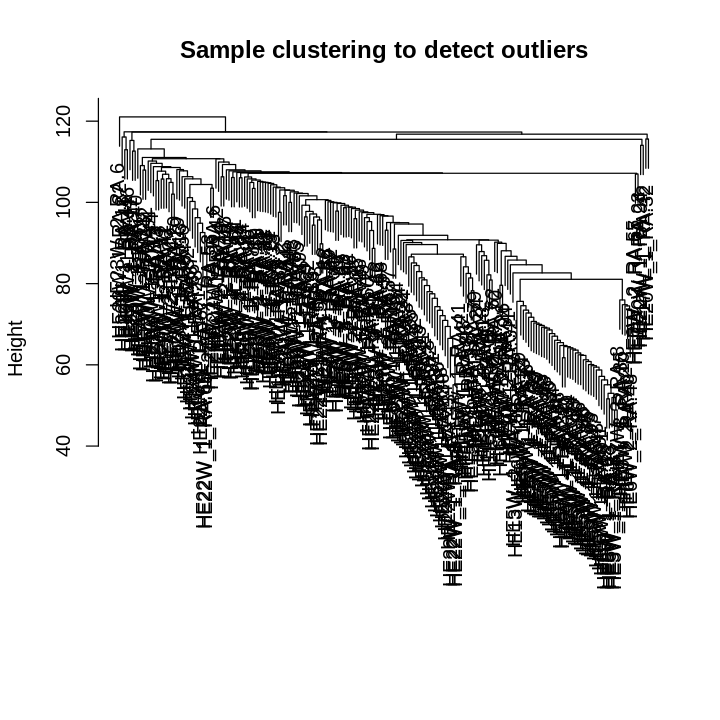

In [20]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [21]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 601 genes from module 1 because their KME is too low.
     ..removing 532 genes from module 2 because their KME is too low.
     ..removing 3 genes from module 4 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


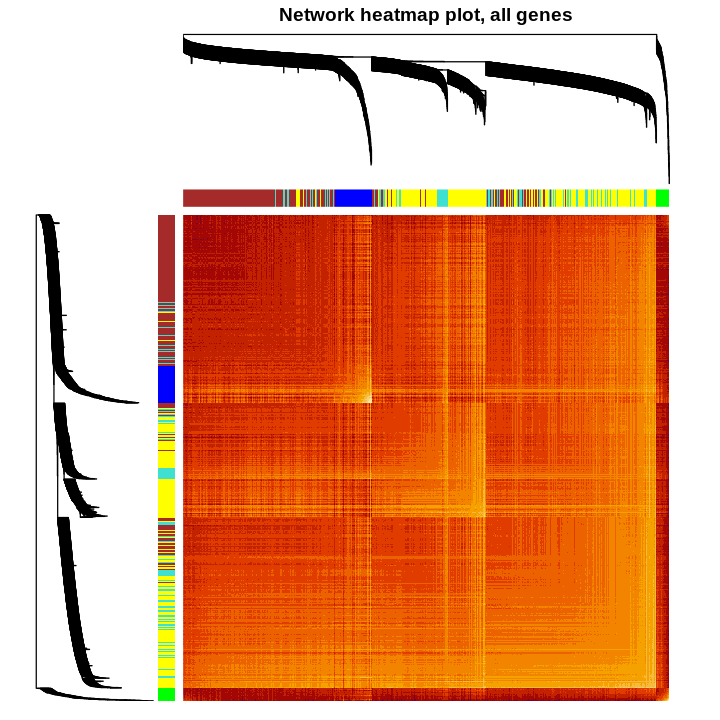

In [22]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

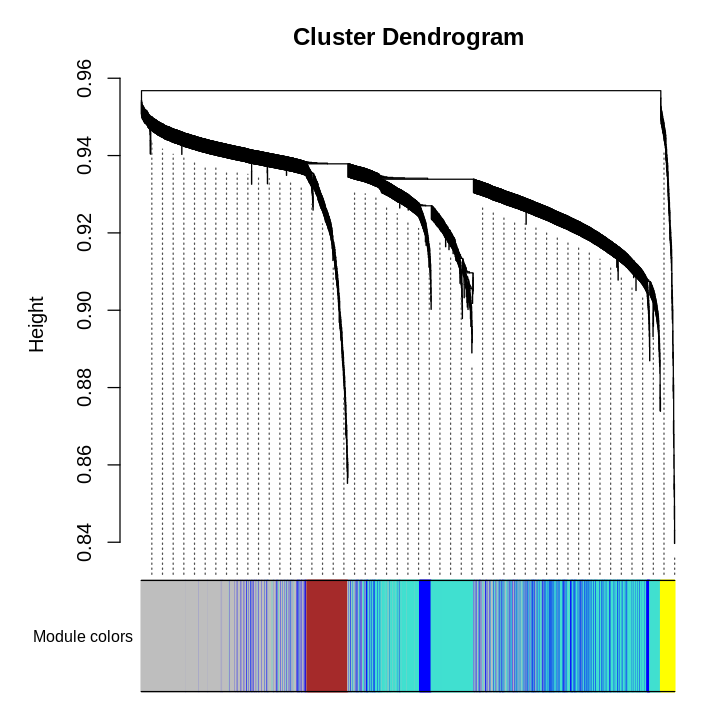

In [23]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [24]:
colors <- table(net$colors)
colors


     blue     brown      grey turquoise    yellow 
      466       246      1136      1262        85 

In [25]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [26]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','RA/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# EC

In [27]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [28]:
df <- df[apply(df,1,mad)>0,]

In [29]:
dim(df)

[1] 3195  204

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

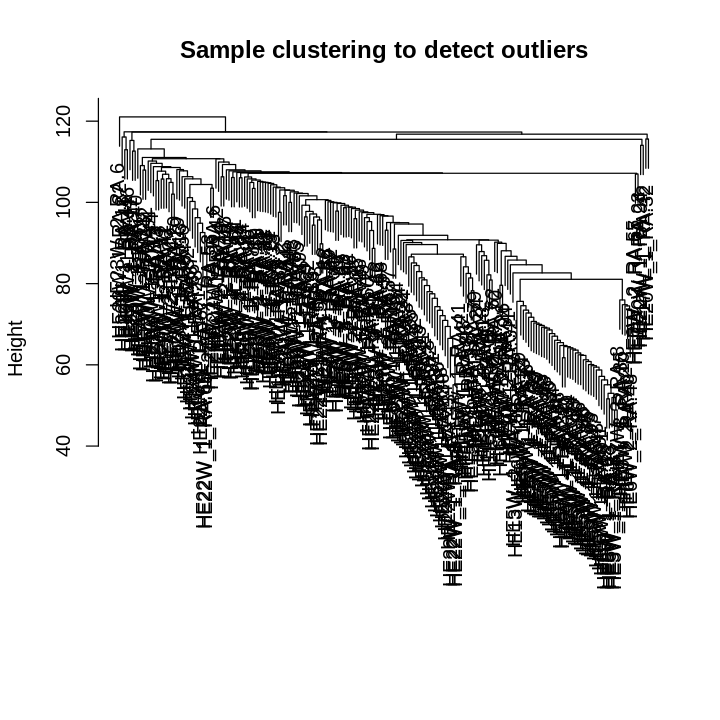

In [30]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [31]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 601 genes from module 1 because their KME is too low.
     ..removing 532 genes from module 2 because their KME is too low.
     ..removing 3 genes from module 4 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


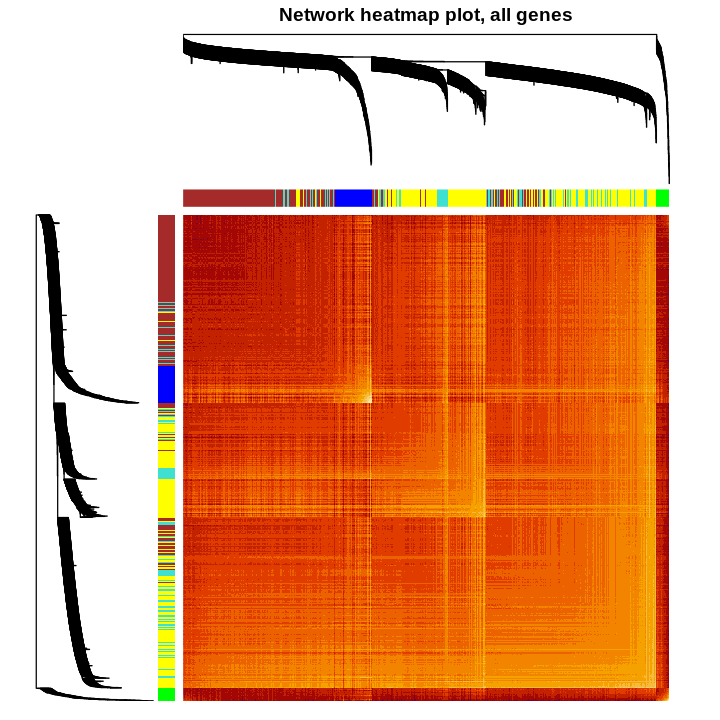

In [32]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

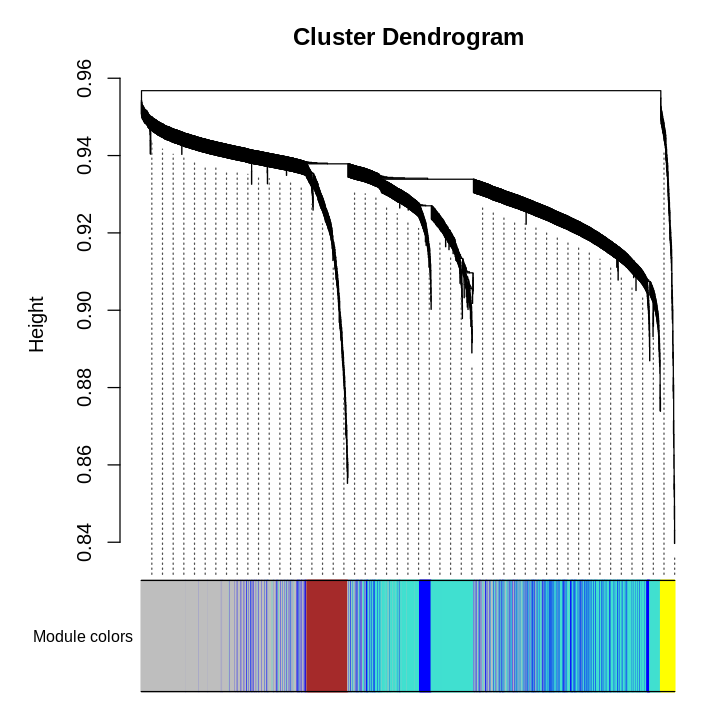

In [33]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [34]:
colors <- table(net$colors)
colors


     blue     brown      grey turquoise    yellow 
      466       246      1136      1262        85 

In [35]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [36]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','RA/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# Myelo

In [37]:
ct = "Myelocyte"

In [38]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [39]:
df <- df[apply(df,1,mad)>0,]

In [40]:
dim(df)

[1] 2963   32

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

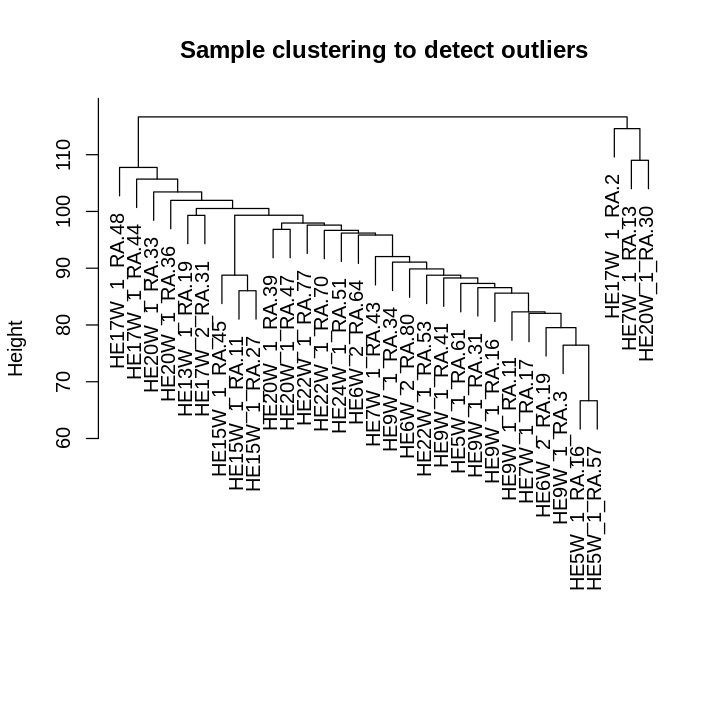

In [41]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [42]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 277 genes from module 1 because their KME is too low.
     ..removing 116 genes from module 2 because their KME is too low.
     ..removing 16 genes from module 3 because their KME is too low.
     ..removing 44 genes from module 4 because their KME is too low.
     ..removing 32 genes from module 5 because their KME is too low.
     ..removing 7 genes from module 6 because their KME is too low.
     ..removing 24 genes from module 7 be

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


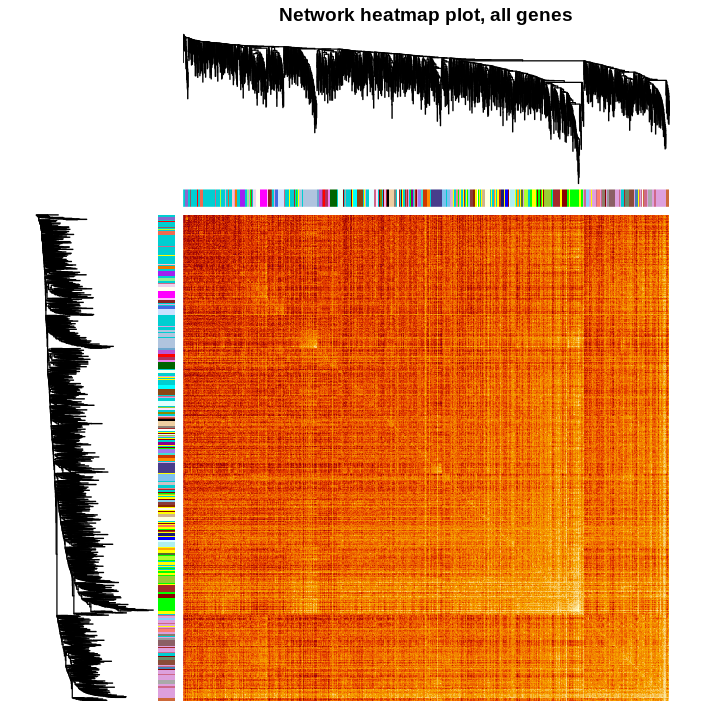

In [43]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

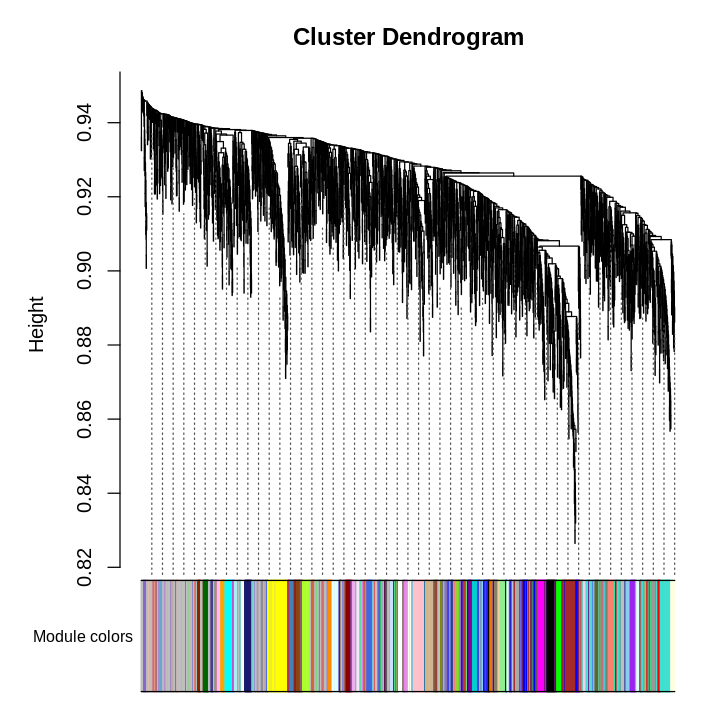

In [44]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [45]:
colors <- table(net$colors)
colors


  antiquewhite4         bisque4           black            blue           brown 
             11              16              76             209             161 
         brown4          coral1          coral2            cyan       darkgreen 
             16              11              10              40              29 
       darkgrey     darkmagenta  darkolivegreen      darkorange     darkorange2 
             26              19              20              24              16 
        darkred   darkseagreen4   darkslateblue   darkturquoise     floralwhite 
             30              12              15              28              16 
          green     greenyellow            grey          grey60       honeydew1 
            101              42             613              32              12 
          ivory  lavenderblush3      lightcoral       lightcyan      lightcyan1 
             17              12              10              34              17 
     lightgreen      lightp

In [46]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [47]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','RA/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# SMC

In [48]:
ct = "Smooth muscle cell"

In [49]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [50]:
df <- df[apply(df,1,mad)>0,]

In [51]:
dim(df)

[1] 1882    9

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

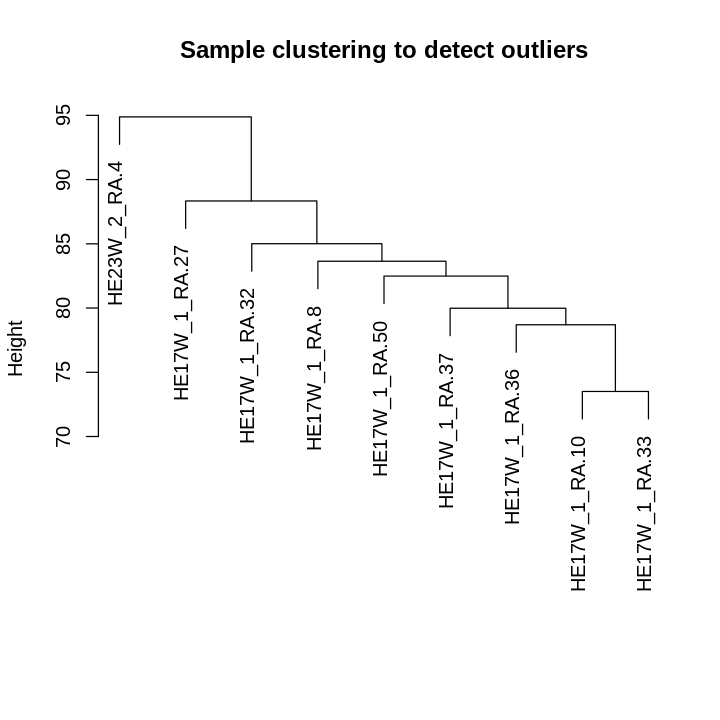

In [52]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [53]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 6 genes from module 59 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


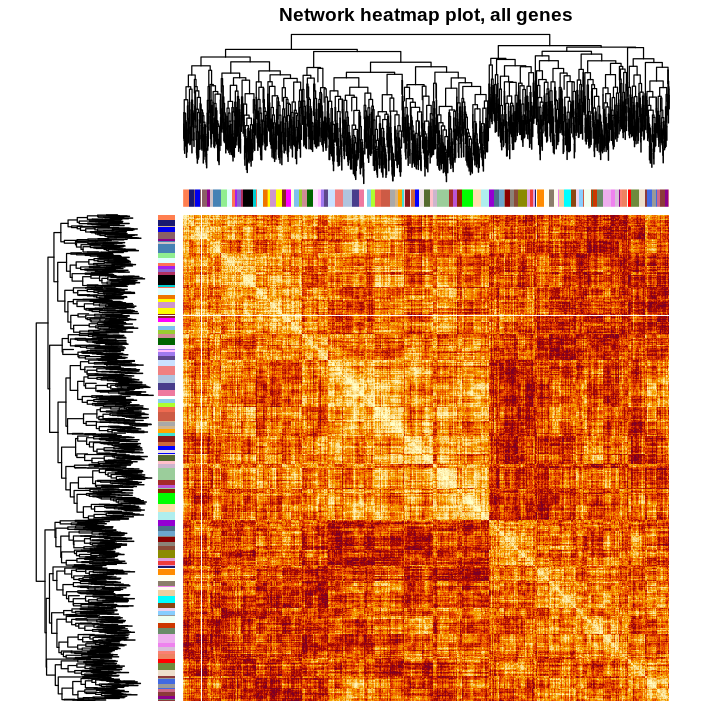

In [54]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

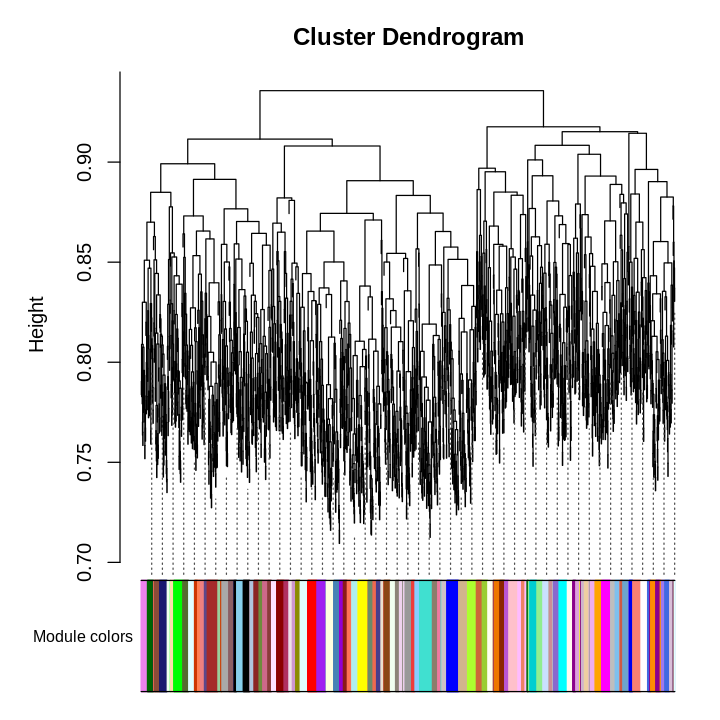

In [55]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [56]:
colors <- table(net$colors)
colors


  antiquewhite2   antiquewhite4         bisque4           black            blue 
             10              16              19              32              43 
          blue2           brown          brown2          brown4           coral 
             13              38              13              19              10 
         coral1          coral2          coral3            cyan       darkgreen 
             16              16              10              29              26 
       darkgrey     darkmagenta  darkolivegreen darkolivegreen4      darkorange 
             24              21              21              13              23 
    darkorange2         darkred   darkseagreen3   darkseagreen4   darkslateblue 
             19              26              10              17              18 
  darkturquoise      darkviolet      firebrick4     floralwhite           green 
             25              13              14              19              33 
    greenyellow            

In [57]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [58]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','RA/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# Lympho

In [59]:
ct = "Lymphocyte"

In [60]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [61]:
df <- df[apply(df,1,mad)>0,]

In [62]:
dim(df)

[1] 2337   11

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

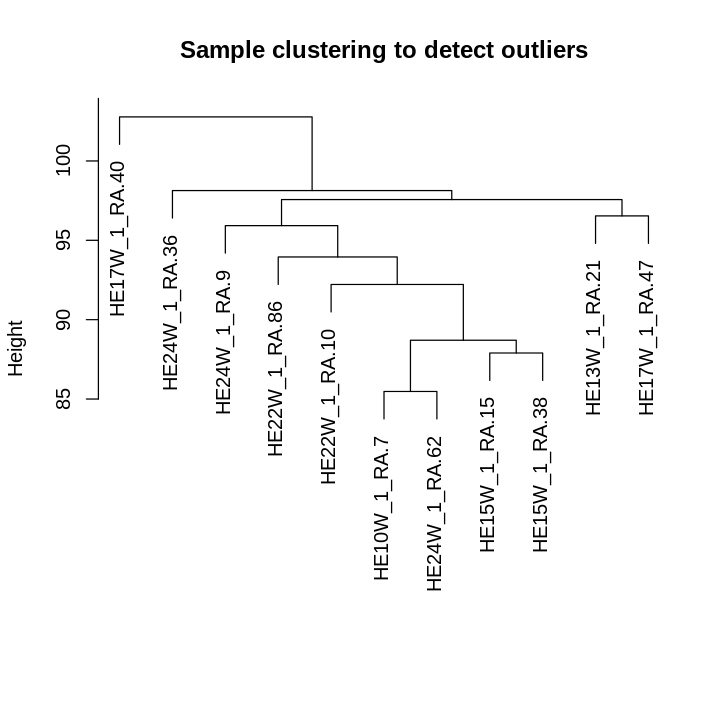

In [63]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [64]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 3 genes from module 1 because their KME is too low.
     ..removing 1 genes from module 2 because their KME is too low.
     ..removing 9 genes from module 3 because their KME is too low.
     ..removing 1 genes from module 6 because their KME is too low.
     ..removing 1 genes from module 10 because their KME is too low.
     ..removing 2 genes from module 22 because their KME is too low.
     ..removing 1 genes from module 24 because

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


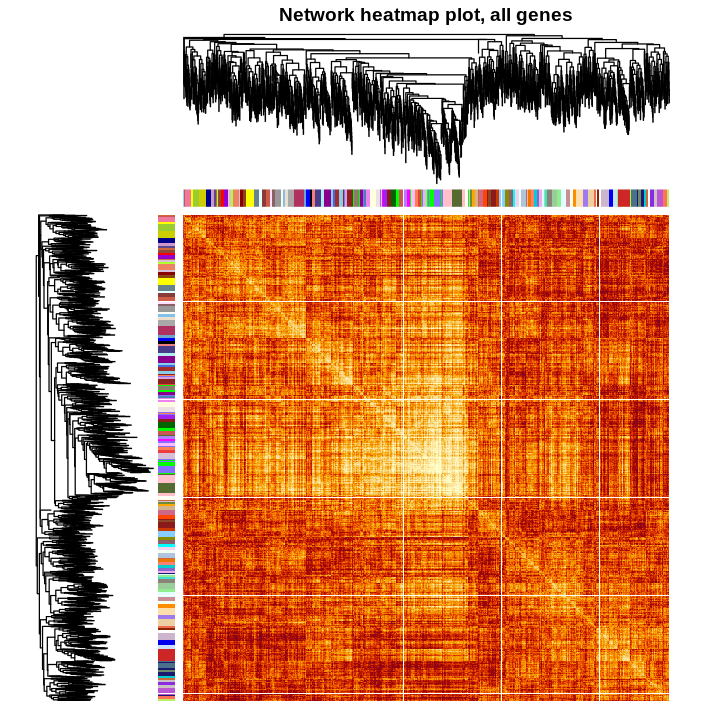

In [65]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

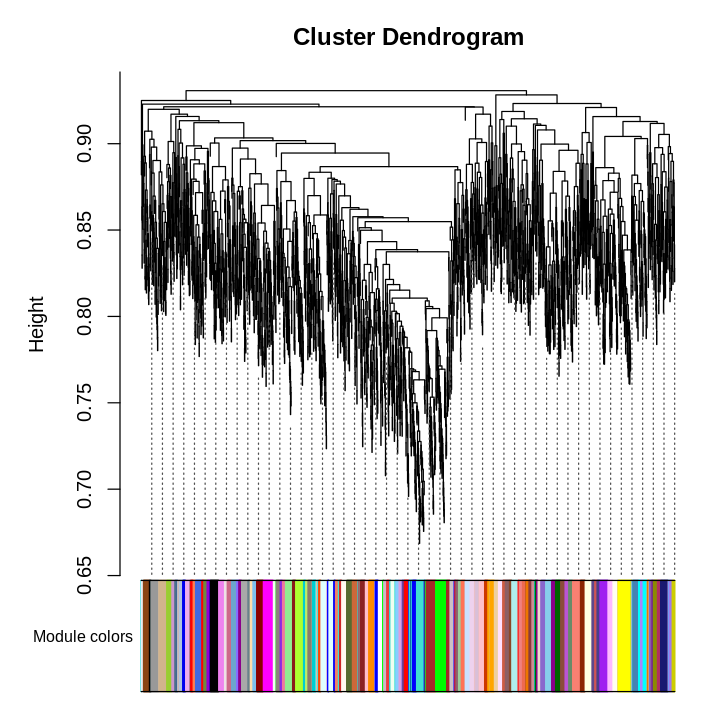

In [66]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [67]:
colors <- table(net$colors)
colors


  antiquewhite2   antiquewhite4         bisque4           black            blue 
             12              17              20              45              66 
          blue2      blueviolet           brown          brown2          brown4 
             13              10              64              14              21 
          coral          coral1          coral2          coral3            cyan 
             12              17              16              11              33 
      darkgreen        darkgrey     darkmagenta  darkolivegreen darkolivegreen2 
             29              28              25              25              10 
darkolivegreen4      darkorange     darkorange2         darkred   darkseagreen3 
             14              27              21              29              12 
  darkseagreen4   darkslateblue   darkturquoise      darkviolet      firebrick3 
             17              20              28              13              10 
     firebrick4     floralw

In [68]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [69]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','RA/',ct,'.',i,'.csv'))
        i = i + 1
    }
}